In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Akses Direktori

In [ ]:
train_dir = pathlib.Path('/content/drive/My Drive/dataset/train')
validation_dir = pathlib.Path('/content/drive/My Drive/dataset/validation')
tes_dir = pathlib.Path('/content/drive/My Drive/dataset/testing')

In [ ]:
import pathlib
import numpy as np
data_dir = "/content/drive/My Drive/dataset/train"
data_dir = pathlib.Path(data_dir)
kelas = np.array([item.name for item in sorted(data_dir.glob('*')) if item.name != "LICENSE.txt"])
kelas

array(['1female', '2male'], dtype='<U7')

In [ ]:
Target_Size = (150,150)

## Visualisasi Dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(150, 150),
  batch_size=32)

Found 800 files belonging to 2 classes.


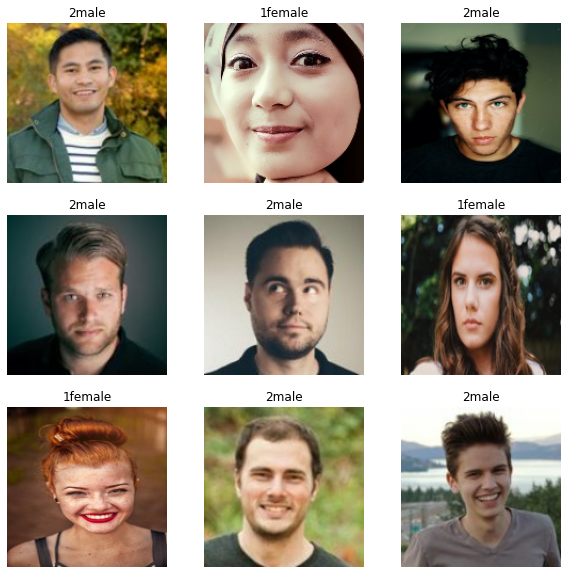

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(kelas[labels[i]])
    plt.axis("off")

In [ ]:
for x_train, y_train in train_ds:
  print(x_train.shape)
  print(y_train.shape)
  break

(32, 150, 150, 3)
(32,)


## Preprocessing


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
tes_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our testing data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=32,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           subset="training",
                                                           seed=42,
                                                           color_mode="rgb",
                                                           target_size=Target_Size,
                                                           class_mode='categorical')

Found 800 images belonging to 2 classes.


In [ ]:
tes_data_gen = tes_image_generator.flow_from_directory(batch_size=32,
                                                           directory=tes_dir,
                                                           shuffle=False,
                                                           seed=42,
                                                           color_mode="rgb",
                                                           target_size=Target_Size,
                                                           class_mode='categorical')

Found 8 images belonging to 1 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=32,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           seed=42,
                                                           color_mode="rgb",
                                                           target_size=Target_Size,
                                                           class_mode='categorical')

Found 240 images belonging to 2 classes.


## Membuat model CNN

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fiveth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer=Adam (0.001), 
              metrics=['accuracy'])

## Training

In [ ]:
history = model.fit(train_data_gen, 
                    epochs=15, 
                    validation_data = val_data_gen, 
                    verbose = 1, 
                    validation_steps=2)

Epoch 1/15
25/25 [==============================] - 31s 1s/step - loss: 0.3842 - accuracy: 0.8338 - val_loss: 0.8949 - val_accuracy: 0.5000
Epoch 2/15
25/25 [==============================] - 31s 1s/step - loss: 0.4005 - accuracy: 0.8225 - val_loss: 1.0977 - val_accuracy: 0.5469
Epoch 3/15
25/25 [==============================] - 31s 1s/step - loss: 0.3650 - accuracy: 0.8550 - val_loss: 0.7426 - val_accuracy: 0.5938
Epoch 4/15
25/25 [==============================] - 30s 1s/step - loss: 0.2888 - accuracy: 0.8863 - val_loss: 0.9837 - val_accuracy: 0.6406
Epoch 5/15
25/25 [==============================] - 30s 1s/step - loss: 0.2701 - accuracy: 0.8800 - val_loss: 0.8781 - val_accuracy: 0.6406
Epoch 6/15
25/25 [==============================] - 31s 1s/step - loss: 0.2044 - accuracy: 0.9100 - val_loss: 1.3819 - val_accuracy: 0.6250
Epoch 7/15
25/25 [==============================] - 31s 1s/step - loss: 0.2295 - accuracy: 0.9075 - val_loss: 0.6580 - val_accuracy: 0.7656
Epoch 8/15
25/25 [==

In [ ]:
scores = model.evaluate(train_data_gen, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

25/25 [==============================] - 11s 452ms/step - loss: 0.1329 - accuracy: 0.9600

Model Accuracy: 96.00%


In [ ]:
print("Loss : ",(model.evaluate(train_data_gen, verbose=1))[0])

25/25 [==============================] - 11s 452ms/step - loss: 0.1358 - accuracy: 0.9500
Loss :  0.1357603669166565


In [ ]:
scores = model.evaluate(val_data_gen, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

8/8 [==============================] - 2s 261ms/step - loss: 0.5779 - accuracy: 0.8042

Model Accuracy: 80.42%


In [ ]:
print("Loss : ",(model.evaluate(val_data_gen, verbose=1))[0])

8/8 [==============================] - 2s 261ms/step - loss: 0.5779 - accuracy: 0.8042
Loss :  0.577862560749054


In [ ]:
model.save("rps.h5")

1/1 [==============================] - 0s 108ms/step - loss: 5.4560 - accuracy: 0.6250


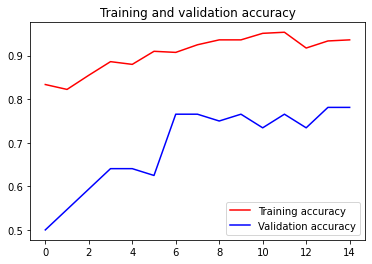

<Figure size 432x288 with 0 Axes>

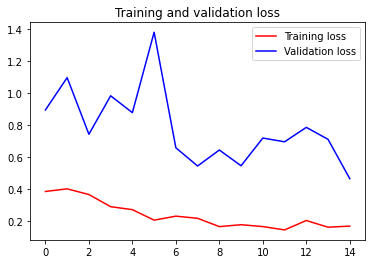

<Figure size 432x288 with 0 Axes>

In [ ]:
model.evaluate(tes_data_gen)
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

(1, 150, 150, 3)


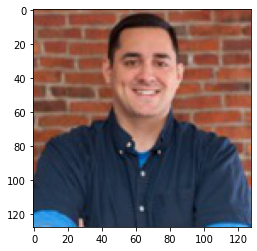

hasil prediksi = 2male


In [ ]:
# validation

from PIL import Image
from skimage import transform
import matplotlib.image as mpimg
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

pathimg = "/content/drive/My Drive/dataset/validation/2male/61.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


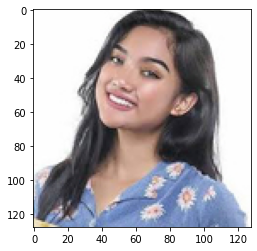

hasil prediksi = 1female


In [ ]:
# testing

from PIL import Image
from skimage import transform
import matplotlib.image as mpimg
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

pathimg = "/content/drive/My Drive/dataset/testing/face/4.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


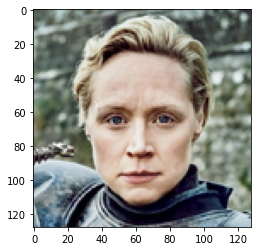

hasil prediksi = 2male


In [ ]:
# testing

from PIL import Image
from skimage import transform
import matplotlib.image as mpimg
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

pathimg = "/content/drive/MyDrive/dataset/testing/face/1.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


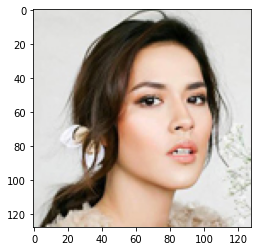

hasil prediksi = 1female


In [ ]:
pathimg = "/content/drive/MyDrive/dataset/testing/face/2.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


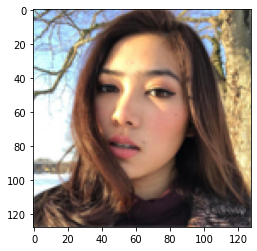

hasil prediksi = 1female


In [ ]:
pathimg = "/content/drive/MyDrive/dataset/testing/face/3.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


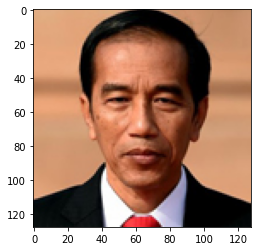

hasil prediksi = 2male


In [ ]:
pathimg = "/content/drive/MyDrive/dataset/testing/face/7.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

(1, 150, 150, 3)


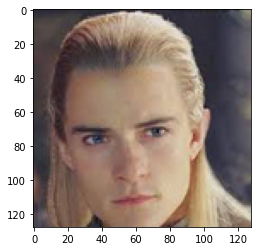

hasil prediksi = 2male


In [ ]:
pathimg = "/content/drive/MyDrive/dataset/testing/face/8.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))